# Medical Data Visualizer

In this project, will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

> #### Data description : 

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

> #### Instructions
  
  By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.

- Import the data from medical_examination.csv and assign it to the df variable
- Create the overweight column in the df variable
- Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
- Draw the Categorical Plot in the draw_cat_plot function
- Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
- Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import : sns.catplot()
- Get the figure for the output and store it in the fig variable
- Draw the Heat Map in the draw_heat_map function
- Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
- Diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
  height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
  height is more than the 97.5th percentile
  weight is less than the 2.5th percentile
  weight is more than the 97.5th percentile
- Calculate the correlation matrix and store it in the corr variable
- Generate a mask for the upper triangle and store it in the mask variable
- Set up the matplotlib figure
- Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("medical_examination.csv")

In [8]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


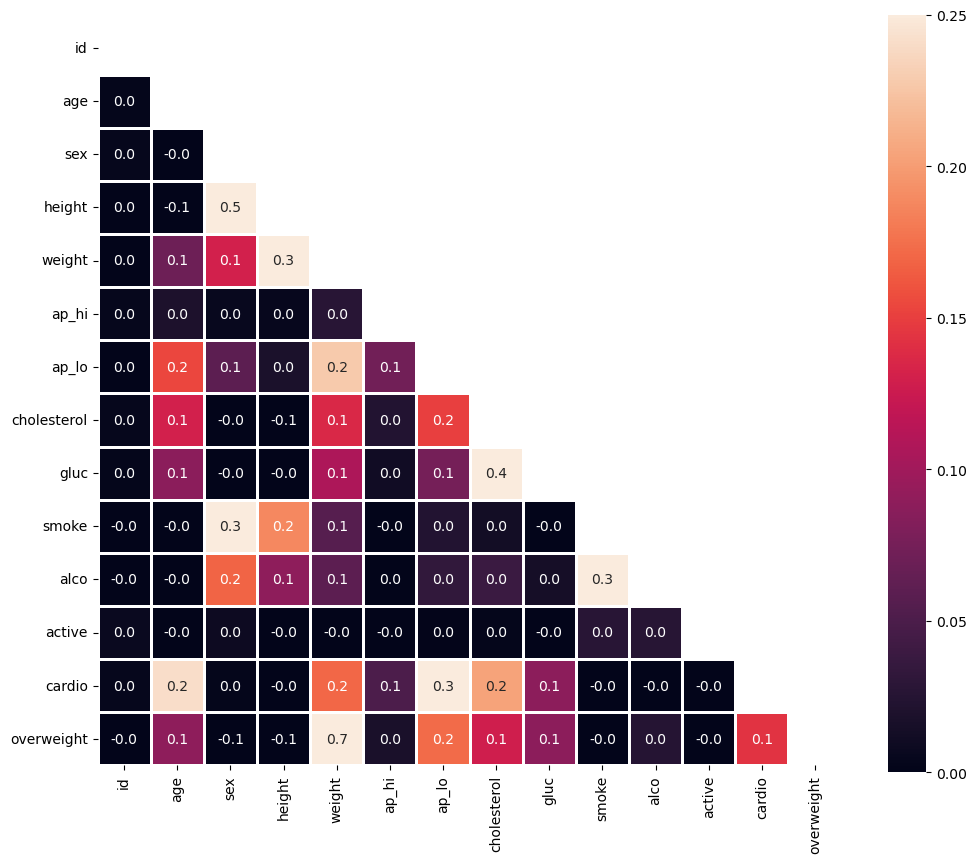

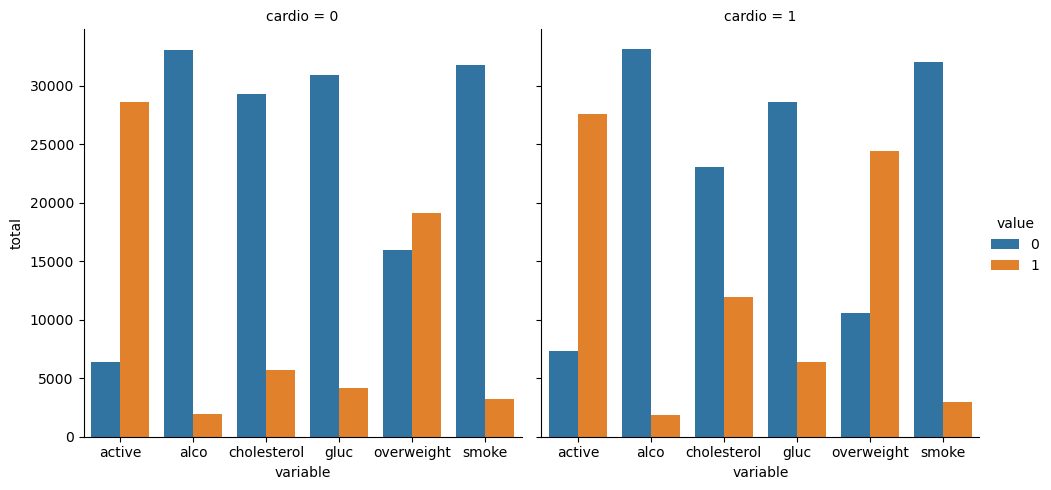

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['overweight'] = np.where((df['weight'] / np.square(df['height']/100))> 25, 1,0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0 , 1)
df['gluc'] = np.where(df['gluc'] == 1, 0 , 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=['active', 'alco', "cholesterol" , 'gluc', 'overweight', 'smoke'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    # Draw the catplot with 'sns.catplot()'
    figure = sns.catplot(x= "variable", kind ="count" ,hue = "value", data = df_cat, col= "cardio")

    figure.set_axis_labels("variable", "total")  

    # Get the figure for the output
    fig = figure#.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
         (df['ap_lo'] <= df['ap_hi']) & 
         (df['height'] >= df['height'].quantile(0.025)) & 
         (df['height'] <= df['height'].quantile(0.975)) &
         (df['weight'] >= df['weight'].quantile(0.025)) & 
         (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype= bool))


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (12,12))

    # Draw the heatmap with 'sns.heatmap()'
    
    sns.heatmap(corr, vmin=0, vmax= 0.25, fmt='.1f', linewidth = 1, annot = True, square = True, mask=mask, cbar_kws = {'shrink':.82})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()
draw_cat_plot()